### xgboost

In [67]:
import xgboost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # matplotlib的高级API
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier 
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV
%matplotlib inline

### 默认参数

In [99]:
# load data
dataset = pd.read_csv('/Users/wangyajun/workspace/Machine Learning Demo/XGBoost/PimaIndiansdiabetes.csv', header = 0)
# split data into X and y
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = test_size, random_state = seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
pre_prob_train = model.predict_proba(X_train)[:,1]
pre_prob_test = model.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.4g" %metrics.accuracy_score(y_train, y_pred_train))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train))
print("Test Accaurcy: %.4g" %metrics.accuracy_score(y_test, y_pred_test))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test))

Train Accaurcy: 1
Train AUC Score: 1.000000
Test Accaurcy: 0.7402
Test AUC Score: 0.783347


### 调参过程

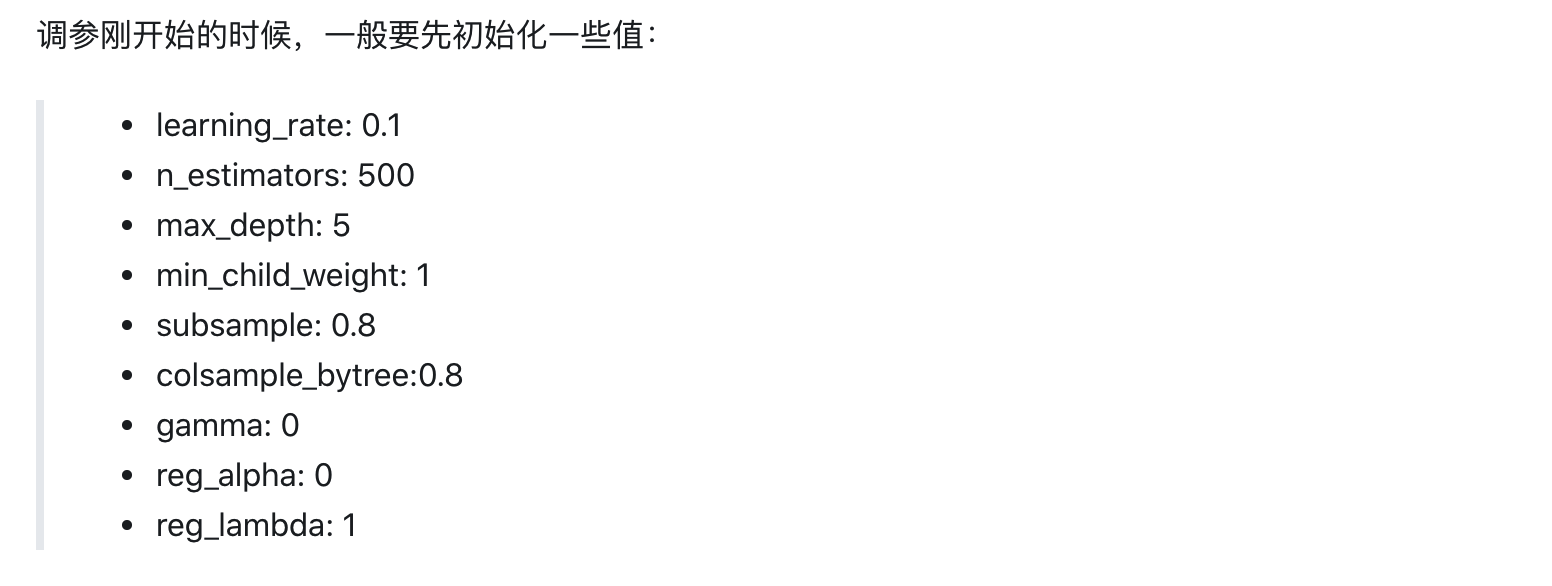

In [61]:
model_0 = XGBClassifier()
model_0.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [181]:
param1 = {'n_estimators':range(20, 301, 10)}
gsearch1 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate = 0.1
        , max_depth = 7
        , min_child_weight = 3
        , subsample = 0.8
    )
    , param_grid = param1
    , scoring = 'roc_auc'
    , iid = False
    , cv = 5
)
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=7, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, s

In [182]:
gsearch1.best_params_

{'n_estimators': 30}

In [183]:
gsearch1.best_score_

0.8152878813216831

In [185]:
model_1 = XGBClassifier(
    learning_rate = 0.1
    , max_depth = 7
    , min_child_weight = 3
    , subsample = 0.8
    , n_estimators = 30
)
model_1.fit(X_train, y_train)

y_pred_train_1 = model_1.predict(X_train)
y_pred_test_1 = model_1.predict(X_test)
pre_prob_train_1 = model_1.predict_proba(X_train)[:,1]
pre_prob_test_1 = model_1.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.4g" %metrics.accuracy_score(y_train, y_pred_train_1))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train_1))
print("Test Accaurcy: %.4g" %metrics.accuracy_score(y_test, y_pred_test_1))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test_1))

Train Accaurcy: 0.9066
Train AUC Score: 0.966666
Test Accaurcy: 0.7638
Test AUC Score: 0.831186


In [186]:
param2 = {'max_depth':range(3,14,2), 'min_child_weight':range(0, 5, 1)}
gsearch2 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate = 0.1
        , subsample = 0.8
        , n_estimators = 30
    )
    , param_grid = param2
    , scoring = 'roc_auc'
    , iid = False
    , cv = 5
)
gsearch2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrain...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=0.8, tree_method=None,
                                    

In [187]:
gsearch2.best_params_

{'max_depth': 3, 'min_child_weight': 4}

In [92]:
gsearch2.best_score_

0.8264487436765752

In [188]:
model_2 = XGBClassifier(
    learning_rate = 0.1
    , n_estimators = 30
    , max_depth = 3
    , subsample = 0.8
    , min_child_weight = 4
)
model_2.fit(X_train, y_train)

y_pred_train_2 = model_2.predict(X_train)
y_pred_test_2 = model_2.predict(X_test)
pre_prob_train_2 = model_2.predict_proba(X_train)[:,1]
pre_prob_test_2 = model_2.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.4g" %metrics.accuracy_score(y_train, y_pred_train_2))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train_2))
print("Test Accaurcy: %.4g" %metrics.accuracy_score(y_test, y_pred_test_2))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test_2))

Train Accaurcy: 0.8191
Train AUC Score: 0.907839
Test Accaurcy: 0.7756
Test AUC Score: 0.830616


In [189]:
param3 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch3 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate = 0.1
        , n_estimators = 30
        , max_depth = 3
        , min_child_weight = 4
    )
    , param_grid = param3
    , scoring = 'roc_auc'
    , iid = False
    , cv = 5
)
gsearch3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=4,
                                     missing=nan, monotone_constraints=Non...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsampl

In [190]:
gsearch3.best_params_

{'subsample': 0.8}

In [191]:
gsearch3.best_score_

0.8288003957802026

In [192]:
model_3 = XGBClassifier(
    learning_rate = 0.1
    , n_estimators = 30
    , max_depth = 3
    , min_child_weight = 4
    , subsample = 0.8
)
model_3.fit(X_train, y_train)

y_pred_train_3 = model_3.predict(X_train)
y_pred_test_3 = model_3.predict(X_test)
pre_prob_train_3 = model_3.predict_proba(X_train)[:,1]
pre_prob_test_3 = model_3.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.4g" %metrics.accuracy_score(y_train, y_pred_train_3))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train_3))
print("Test Accaurcy: %.4g" %metrics.accuracy_score(y_test, y_pred_test_3))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test_3))

Train Accaurcy: 0.8191
Train AUC Score: 0.907839
Test Accaurcy: 0.7756
Test AUC Score: 0.830616


In [193]:
param4 = {'gamma':range(0, 20, 1)}
gsearch4 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate = 0.1
        , n_estimators = 30
        , max_depth = 3
        , min_child_weight = 4
        , subsample = 0.8
    )
    , param_grid = param4
    , scoring = 'roc_auc'
    , iid = False
    , cv = 5
)
gsearch4.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=4,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=30, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, sc

In [194]:
gsearch4.best_params_

{'gamma': 5}

In [195]:
gsearch4.best_score_

0.8299893041793831

In [196]:
model_4 = XGBClassifier(
    learning_rate = 0.1
    , n_estimators = 30
    , max_depth = 3
    , min_child_weight = 4
    , subsample = 0.8
    , gamma = 5
)
model_4.fit(X_train, y_train)

y_pred_train_4 = model_4.predict(X_train)
y_pred_test_4 = model_4.predict(X_test)
pre_prob_train_4 = model_4.predict_proba(X_train)[:,1]
pre_prob_test_4 = model_4.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.4g" %metrics.accuracy_score(y_train, y_pred_train_4))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train_4))
print("Test Accaurcy: %.4g" %metrics.accuracy_score(y_test, y_pred_test_4))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test_4))

Train Accaurcy: 0.8054
Train AUC Score: 0.894197
Test Accaurcy: 0.7598
Test AUC Score: 0.828603


In [197]:
param5 = {'n_estimators':range(200, 1000, 50)}
gsearch5 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate = 0.1
        
        , max_depth = 3
        , min_child_weight = 4
        , subsample = 0.8
    )
    , param_grid = param5
    , scoring = 'roc_auc'
    , iid = False
    , cv = 5
)
gsearch5.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=4,
                                     missing=nan, monotone_constraints=Non...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsampl

In [198]:
gsearch5.best_params_

{'n_estimators': 200}

In [204]:
model_5 = XGBClassifier(
    learning_rate = 0.1
    , n_estimators = 200
    , max_depth = 3
    , min_child_weight = 4
    , subsample = 0.8
    , gamma = 3
)
model_5.fit(X_train, y_train)

y_pred_train_5 = model_5.predict(X_train)
y_pred_test_5 = model_5.predict(X_test)
pre_prob_train_5 = model_5.predict_proba(X_train)[:,1]
pre_prob_test_5 = model_5.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.5g" %metrics.accuracy_score(y_train, y_pred_train_5))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train_5))
print("Test Accaurcy: %.5g" %metrics.accuracy_score(y_test, y_pred_test_5))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test_5))

Train Accaurcy: 0.8716
Train AUC Score: 0.942224
Test Accaurcy: 0.75197
Test AUC Score: 0.817700


In [208]:
param6 = {
    'max_depth':range(3, 14, 1)
    , 'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1]
    , 'min_child_weight':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4, 5]
}
gsearch6 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate = 0.1
        , n_estimators = 200
    )
    , param_grid = param6
    , scoring = 'roc_auc'
    , iid = False
    , cv = 5
)
gsearch6.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrain...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid=False, n_jobs=None,
             param_grid={'max_depth': range(3, 14),
    

In [209]:
gsearch6.best_params_

{'max_depth': 3, 'min_child_weight': 0.9, 'subsample': 1}

In [210]:
gsearch6.best_score_

0.8105395989241467

In [215]:
model_6 = XGBClassifier(
    learning_rate = 0.1
    , n_estimators = 200
    , max_depth = 3
    , min_child_weight = 0.9
    , subsample = 1
    , gamma = 0
)
model_6.fit(X_train, y_train)

y_pred_train_6 = model_6.predict(X_train)
y_pred_test_6 = model_6.predict(X_test)
pre_prob_train_6 = model_6.predict_proba(X_train)[:,1]
pre_prob_test_6 = model_6.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.6g" %metrics.accuracy_score(y_train, y_pred_train_6))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train_6))
print("Test Accaurcy: %.6g" %metrics.accuracy_score(y_test, y_pred_test_6))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test_6))

Train Accaurcy: 0.964981
Train AUC Score: 0.996352
Test Accaurcy: 0.751969
Test AUC Score: 0.808508


In [216]:
model_6 = XGBClassifier(
    learning_rate = 0.1
    , n_estimators = 200
    , max_depth = 3
    , min_child_weight = 0.9
    , subsample = 1
    , gamma = 1
)
model_6.fit(X_train, y_train)

y_pred_train_6 = model_6.predict(X_train)
y_pred_test_6 = model_6.predict(X_test)
pre_prob_train_6 = model_6.predict_proba(X_train)[:,1]
pre_prob_test_6 = model_6.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.6g" %metrics.accuracy_score(y_train, y_pred_train_6))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train_6))
print("Test Accaurcy: %.6g" %metrics.accuracy_score(y_test, y_pred_test_6))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test_6))

Train Accaurcy: 0.894942
Train AUC Score: 0.966531
Test Accaurcy: 0.767717
Test AUC Score: 0.821457


In [292]:
model_6 = XGBClassifier(
    learning_rate = 0.05
    , n_estimators = 20
    , max_depth = 5
    , min_child_weight = 1.2
    , subsample = 1
    , gamma = 1.2
    , alpha = 1.6
)
model_6.fit(X_train, y_train)

y_pred_train_6 = model_6.predict(X_train)
y_pred_test_6 = model_6.predict(X_test)
pre_prob_train_6 = model_6.predict_proba(X_train)[:,1]
pre_prob_test_6 = model_6.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.6g" %metrics.accuracy_score(y_train, y_pred_train_6))
print("Train Precision: %.6g" %metrics.precision_score(y_train, y_pred_train_6))
print("Train Recall: %.6g" %metrics.recall_score(y_train, y_pred_train_6))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train_6))
print("Test Accaurcy: %.6g" %metrics.accuracy_score(y_test, y_pred_test_6))
print("Test Precision: %.6g" %metrics.precision_score(y_test, y_pred_test_6))
print("Test Recall: %.6g" %metrics.recall_score(y_test, y_pred_test_6))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test_6))

Train Accaurcy: 0.838521
Train Precision: 0.82069
Train Recall: 0.676136
Train AUC Score: 0.911327
Test Accaurcy: 0.76378
Test Precision: 0.695122
Test Recall: 0.619565
Test AUC Score: 0.833602


In [309]:
cv_params = {'n_estimators':range(10, 500, 10)}
other_params = {
    'learning_rate':0.1
    , 'n_estimators' : 500
    , 'max_depth' : 5
    , 'min_child_weight' : 1
    , 'subsample' : 0.8
    , 'colsample_bytree' : 0.8
    , 'gamma' : 0
    , 'reg_alpha' : 0
    , 'reg_lambda' : 1
    , 'seed' : 0
}
model = XGBClassifier(**other_params)
gsearch = GridSearchCV(
    estimator = model
    , param_grid = cv_params
    , scoring = 'roc_auc'
    , iid = False
    , cv = 5
    , n_jobs = 6
)
gsearch.fit(X_train, y_train);

In [310]:
gsearch.best_params_

{'n_estimators': 30}

In [311]:
gsearch.best_score_

0.8163976685201444

In [305]:
model_6 = XGBClassifier(
    learning_rate = 0.1
    , n_estimators = 30
    , max_depth = 5
    , min_child_weight = 1
    , subsample = 0.8
    , colsample_bytree = 0.8
    , gamma = 0
    , reg_alpha = 0
    , reg_lambda = 1
    , seed = 0
)
model_6.fit(X_train, y_train)

y_pred_train_6 = model_6.predict(X_train)
y_pred_test_6 = model_6.predict(X_test)
pre_prob_train_6 = model_6.predict_proba(X_train)[:,1]
pre_prob_test_6 = model_6.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.6g" %metrics.accuracy_score(y_train, y_pred_train_6))
print("Train Precision: %.6g" %metrics.precision_score(y_train, y_pred_train_6))
print("Train Recall: %.6g" %metrics.recall_score(y_train, y_pred_train_6))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train_6))
print("Test Accaurcy: %.6g" %metrics.accuracy_score(y_test, y_pred_test_6))
print("Test Precision: %.6g" %metrics.precision_score(y_test, y_pred_test_6))
print("Test Recall: %.6g" %metrics.recall_score(y_test, y_pred_test_6))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test_6))

Train Accaurcy: 0.914397
Train Precision: 0.917722
Train Recall: 0.823864
Train AUC Score: 0.976046
Test Accaurcy: 0.755906
Test Precision: 0.663043
Test Recall: 0.663043
Test AUC Score: 0.826355


In [312]:
cv_params = {'n_estimators':range(10, 100, 5)}
other_params = {
    'learning_rate':0.1
    , 'n_estimators' : 500
    , 'max_depth' : 5
    , 'min_child_weight' : 1
    , 'subsample' : 0.8
    , 'colsample_bytree' : 0.8
    , 'gamma' : 0
    , 'reg_alpha' : 0
    , 'reg_lambda' : 1
    , 'seed' : 0
}
model = XGBClassifier(**other_params)
gsearch = GridSearchCV(
    estimator = model
    , param_grid = cv_params
    , scoring = 'roc_auc'
    , iid = False
    , cv = 5
    , n_jobs = 6
)
gsearch.fit(X_train, y_train);

In [313]:
print(gsearch.best_params_)
print(gsearch.best_score_)

{'n_estimators': 45}
0.8175485666903578


In [316]:
cv_params = {'n_estimators':range(30, 50, 1)}
other_params = {
    'learning_rate':0.1
    , 'n_estimators' : 500
    , 'max_depth' : 5
    , 'min_child_weight' : 1
    , 'subsample' : 0.8
    , 'colsample_bytree' : 0.8
    , 'gamma' : 0
    , 'reg_alpha' : 0
    , 'reg_lambda' : 1
    , 'seed' : 0
}
model = XGBClassifier(**other_params)
gsearch = GridSearchCV(
    estimator = model
    , param_grid = cv_params
    , scoring = 'roc_auc'
    , iid = False
    , cv = 5
    , n_jobs = 6
)
gsearch.fit(X_train, y_train);
print(gsearch.best_params_)
print(gsearch.best_score_)

{'n_estimators': 32}
0.8182286048747859


In [318]:
cv_params = {'n_estimators':[30, 32, 45]}
other_params = {
    'learning_rate':0.1
    , 'n_estimators' : 500
    , 'max_depth' : 5
    , 'min_child_weight' : 1
    , 'subsample' : 0.8
    , 'colsample_bytree' : 0.8
    , 'gamma' : 0
    , 'reg_alpha' : 0
    , 'reg_lambda' : 1
    , 'seed' : 0
}
model = XGBClassifier(**other_params)
gsearch = GridSearchCV(
    estimator = model
    , param_grid = cv_params
    , scoring = 'roc_auc'
    , iid = False
    , cv = 5
    , n_jobs = 6
)
gsearch.fit(X_train, y_train);
print(gsearch.best_params_)
print(gsearch.best_score_)

{'n_estimators': 32}
0.8182286048747859


In [319]:
model_6 = XGBClassifier(
    learning_rate = 0.1
    , n_estimators = 32
    , max_depth = 5
    , min_child_weight = 1
    , subsample = 0.8
    , colsample_bytree = 0.8
    , gamma = 0
    , reg_alpha = 0
    , reg_lambda = 1
    , seed = 0
)
model_6.fit(X_train, y_train)

y_pred_train_6 = model_6.predict(X_train)
y_pred_test_6 = model_6.predict(X_test)
pre_prob_train_6 = model_6.predict_proba(X_train)[:,1]
pre_prob_test_6 = model_6.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.6g" %metrics.accuracy_score(y_train, y_pred_train_6))
print("Train Precision: %.6g" %metrics.precision_score(y_train, y_pred_train_6))
print("Train Recall: %.6g" %metrics.recall_score(y_train, y_pred_train_6))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train_6))
print("Test Accaurcy: %.6g" %metrics.accuracy_score(y_test, y_pred_test_6))
print("Test Precision: %.6g" %metrics.precision_score(y_test, y_pred_test_6))
print("Test Recall: %.6g" %metrics.recall_score(y_test, y_pred_test_6))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test_6))

Train Accaurcy: 0.918288
Train Precision: 0.929487
Train Recall: 0.823864
Train AUC Score: 0.977323
Test Accaurcy: 0.759843
Test Precision: 0.674157
Test Recall: 0.652174
Test AUC Score: 0.829106


In [320]:
cv_params = {'max_depth':range(2, 14, 1), 'min_child_weight':range(1, 7, 1)}
other_params = {
    'learning_rate':0.1
    , 'n_estimators' : 32
    , 'max_depth' : 5
    , 'min_child_weight' : 1
    , 'subsample' : 0.8
    , 'colsample_bytree' : 0.8
    , 'gamma' : 0
    , 'reg_alpha' : 0
    , 'reg_lambda' : 1
    , 'seed' : 0
}
model = XGBClassifier(**other_params)
gsearch = GridSearchCV(
    estimator = model
    , param_grid = cv_params
    , scoring = 'roc_auc'
    , iid = False
    , cv = 5
    , n_jobs = 6
)
gsearch.fit(X_train, y_train);
print(gsearch.best_params_)
print(gsearch.best_score_)

{'max_depth': 2, 'min_child_weight': 6}
0.830979799880151


In [321]:
model_6 = XGBClassifier(
    learning_rate = 0.1
    , n_estimators = 32
    , max_depth = 2
    , min_child_weight = 6
    , subsample = 0.8
    , colsample_bytree = 0.8
    , gamma = 0
    , reg_alpha = 0
    , reg_lambda = 1
    , seed = 0
)
model_6.fit(X_train, y_train)

y_pred_train_6 = model_6.predict(X_train)
y_pred_test_6 = model_6.predict(X_test)
pre_prob_train_6 = model_6.predict_proba(X_train)[:,1]
pre_prob_test_6 = model_6.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.6g" %metrics.accuracy_score(y_train, y_pred_train_6))
print("Train Precision: %.6g" %metrics.precision_score(y_train, y_pred_train_6))
print("Train Recall: %.6g" %metrics.recall_score(y_train, y_pred_train_6))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train_6))
print("Test Accaurcy: %.6g" %metrics.accuracy_score(y_test, y_pred_test_6))
print("Test Precision: %.6g" %metrics.precision_score(y_test, y_pred_test_6))
print("Test Recall: %.6g" %metrics.recall_score(y_test, y_pred_test_6))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test_6))

Train Accaurcy: 0.79572
Train Precision: 0.744828
Train Recall: 0.613636
Train AUC Score: 0.884397
Test Accaurcy: 0.76378
Test Precision: 0.690476
Test Recall: 0.630435
Test AUC Score: 0.831186


In [322]:
cv_params = {'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
other_params = {
    'learning_rate':0.1
    , 'n_estimators' : 32
    , 'max_depth' : 2
    , 'min_child_weight' : 6
    , 'subsample' : 0.8
    , 'colsample_bytree' : 0.8
    , 'gamma' : 0
    , 'reg_alpha' : 0
    , 'reg_lambda' : 1
    , 'seed' : 0
}
model = XGBClassifier(**other_params)
gsearch = GridSearchCV(
    estimator = model
    , param_grid = cv_params
    , scoring = 'roc_auc'
    , iid = False
    , cv = 5
    , n_jobs = 6
)
gsearch.fit(X_train, y_train);
print(gsearch.best_params_)
print(gsearch.best_score_)

{'gamma': 0.1}
0.8310614992265564


In [323]:
model_6 = XGBClassifier(
    learning_rate = 0.1
    , n_estimators = 32
    , max_depth = 2
    , min_child_weight = 6
    , subsample = 0.8
    , colsample_bytree = 0.8
    , gamma = 0.1
    , reg_alpha = 0
    , reg_lambda = 1
    , seed = 0
)
model_6.fit(X_train, y_train)

y_pred_train_6 = model_6.predict(X_train)
y_pred_test_6 = model_6.predict(X_test)
pre_prob_train_6 = model_6.predict_proba(X_train)[:,1]
pre_prob_test_6 = model_6.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.6g" %metrics.accuracy_score(y_train, y_pred_train_6))
print("Train Precision: %.6g" %metrics.precision_score(y_train, y_pred_train_6))
print("Train Recall: %.6g" %metrics.recall_score(y_train, y_pred_train_6))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train_6))
print("Test Accaurcy: %.6g" %metrics.accuracy_score(y_test, y_pred_test_6))
print("Test Precision: %.6g" %metrics.precision_score(y_test, y_pred_test_6))
print("Test Recall: %.6g" %metrics.recall_score(y_test, y_pred_test_6))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test_6))

Train Accaurcy: 0.79572
Train Precision: 0.744828
Train Recall: 0.613636
Train AUC Score: 0.884397
Test Accaurcy: 0.76378
Test Precision: 0.690476
Test Recall: 0.630435
Test AUC Score: 0.831186


In [324]:
cv_params = {'subsample':[0.6, 0.7, 0.8, 0.9, 1], 'colsample_bytree':[0.6, 0.7, 0.8, 0.9, 1]}
other_params = {
    'learning_rate':0.1
    , 'n_estimators' : 32
    , 'max_depth' : 2
    , 'min_child_weight' : 6
    , 'subsample' : 0.8
    , 'colsample_bytree' : 0.8
    , 'gamma' : 0
    , 'reg_alpha' : 0
    , 'reg_lambda' : 1
    , 'seed' : 0
}
model = XGBClassifier(**other_params)
gsearch = GridSearchCV(
    estimator = model
    , param_grid = cv_params
    , scoring = 'roc_auc'
    , iid = False
    , cv = 5
    , n_jobs = 6
)
gsearch.fit(X_train, y_train);
print(gsearch.best_params_)
print(gsearch.best_score_)

{'colsample_bytree': 0.6, 'subsample': 0.7}
0.8335226005825216


In [325]:
model_6 = XGBClassifier(
    learning_rate = 0.1
    , n_estimators = 32
    , max_depth = 2
    , min_child_weight = 6
    , subsample = 0.7
    , colsample_bytree = 0.6
    , gamma = 0.1
    , reg_alpha = 0
    , reg_lambda = 1
    , seed = 0
)
model_6.fit(X_train, y_train)

y_pred_train_6 = model_6.predict(X_train)
y_pred_test_6 = model_6.predict(X_test)
pre_prob_train_6 = model_6.predict_proba(X_train)[:,1]
pre_prob_test_6 = model_6.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.6g" %metrics.accuracy_score(y_train, y_pred_train_6))
print("Train Precision: %.6g" %metrics.precision_score(y_train, y_pred_train_6))
print("Train Recall: %.6g" %metrics.recall_score(y_train, y_pred_train_6))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train_6))
print("Test Accaurcy: %.6g" %metrics.accuracy_score(y_test, y_pred_test_6))
print("Test Precision: %.6g" %metrics.precision_score(y_test, y_pred_test_6))
print("Test Recall: %.6g" %metrics.recall_score(y_test, y_pred_test_6))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test_6))

Train Accaurcy: 0.79572
Train Precision: 0.751773
Train Recall: 0.602273
Train AUC Score: 0.881892
Test Accaurcy: 0.755906
Test Precision: 0.697368
Test Recall: 0.576087
Test AUC Score: 0.833434


In [326]:
cv_params = {'reg_alpha':[0.05, 0.1, 0.2, 1, 2, 3], 'reg_lambda':[0.05, 0.1, 0.2, 1, 2, 3]}
other_params = {
    'learning_rate':0.1
    , 'n_estimators' : 32
    , 'max_depth' : 2
    , 'min_child_weight' : 6
    , 'subsample' : 0.7
    , 'colsample_bytree' : 0.6
    , 'gamma' : 0
    , 'reg_alpha' : 0
    , 'reg_lambda' : 1
    , 'seed' : 0
}
model = XGBClassifier(**other_params)
gsearch = GridSearchCV(
    estimator = model
    , param_grid = cv_params
    , scoring = 'roc_auc'
    , iid = False
    , cv = 5
    , n_jobs = 6
)
gsearch.fit(X_train, y_train);
print(gsearch.best_params_)
print(gsearch.best_score_)

{'reg_alpha': 0.2, 'reg_lambda': 1}
0.8351621618796772


In [327]:
model_6 = XGBClassifier(
    learning_rate = 0.1
    , n_estimators = 32
    , max_depth = 2
    , min_child_weight = 6
    , subsample = 0.7
    , colsample_bytree = 0.6
    , gamma = 0.1
    , reg_alpha = 0.2
    , reg_lambda = 1
    , seed = 0
)
model_6.fit(X_train, y_train)

y_pred_train_6 = model_6.predict(X_train)
y_pred_test_6 = model_6.predict(X_test)
pre_prob_train_6 = model_6.predict_proba(X_train)[:,1]
pre_prob_test_6 = model_6.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.6g" %metrics.accuracy_score(y_train, y_pred_train_6))
print("Train Precision: %.6g" %metrics.precision_score(y_train, y_pred_train_6))
print("Train Recall: %.6g" %metrics.recall_score(y_train, y_pred_train_6))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train_6))
print("Test Accaurcy: %.6g" %metrics.accuracy_score(y_test, y_pred_test_6))
print("Test Precision: %.6g" %metrics.precision_score(y_test, y_pred_test_6))
print("Test Recall: %.6g" %metrics.recall_score(y_test, y_pred_test_6))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test_6))

Train Accaurcy: 0.801556
Train Precision: 0.772059
Train Recall: 0.596591
Train AUC Score: 0.880858
Test Accaurcy: 0.759843
Test Precision: 0.696203
Test Recall: 0.597826
Test AUC Score: 0.833367


In [328]:
cv_params = {'learning_rate':[0.01, 0.02, 0.05, 0.1, 0.2]}
other_params = {
    'learning_rate':0.1
    , 'n_estimators' : 32
    , 'max_depth' : 2
    , 'min_child_weight' : 6
    , 'subsample' : 0.7
    , 'colsample_bytree' : 0.6
    , 'gamma' : 0
    , 'reg_alpha' : 0.2
    , 'reg_lambda' : 1
    , 'seed' : 0
}
model = XGBClassifier(**other_params)
gsearch = GridSearchCV(
    estimator = model
    , param_grid = cv_params
    , scoring = 'roc_auc'
    , iid = False
    , cv = 5
    , n_jobs = 6
)
gsearch.fit(X_train, y_train);
print(gsearch.best_params_)
print(gsearch.best_score_)

{'learning_rate': 0.1}
0.8351621618796772


In [329]:
model_6 = XGBClassifier(
    learning_rate = 0.1
    , n_estimators = 32
    , max_depth = 2
    , min_child_weight = 6
    , subsample = 0.7
    , colsample_bytree = 0.6
    , gamma = 0.1
    , reg_alpha = 0.2
    , reg_lambda = 1
    , seed = 0
)
model_6.fit(X_train, y_train)

y_pred_train_6 = model_6.predict(X_train)
y_pred_test_6 = model_6.predict(X_test)
pre_prob_train_6 = model_6.predict_proba(X_train)[:,1]
pre_prob_test_6 = model_6.predict_proba(X_test)[:,1]
# evaluate predictions
print("Train Accaurcy: %.6g" %metrics.accuracy_score(y_train, y_pred_train_6))
print("Train Precision: %.6g" %metrics.precision_score(y_train, y_pred_train_6))
print("Train Recall: %.6g" %metrics.recall_score(y_train, y_pred_train_6))
print("Train AUC Score: %f" %metrics.roc_auc_score(y_train, pre_prob_train_6))
print("Test Accaurcy: %.6g" %metrics.accuracy_score(y_test, y_pred_test_6))
print("Test Precision: %.6g" %metrics.precision_score(y_test, y_pred_test_6))
print("Test Recall: %.6g" %metrics.recall_score(y_test, y_pred_test_6))
print("Test AUC Score: %f" %metrics.roc_auc_score(y_test, pre_prob_test_6))

Train Accaurcy: 0.801556
Train Precision: 0.772059
Train Recall: 0.596591
Train AUC Score: 0.880858
Test Accaurcy: 0.759843
Test Precision: 0.696203
Test Recall: 0.597826
Test AUC Score: 0.833367


### 参考博客
https://blog.csdn.net/v_JULY_v/article/details/81410574

https://blog.csdn.net/htbeker/article/details/91517805

https://segmentfault.com/a/1190000014040317

https://github.com/NLP-LOVE/ML-NLP/tree/master/Machine%20Learning/3.3%20XGBoost